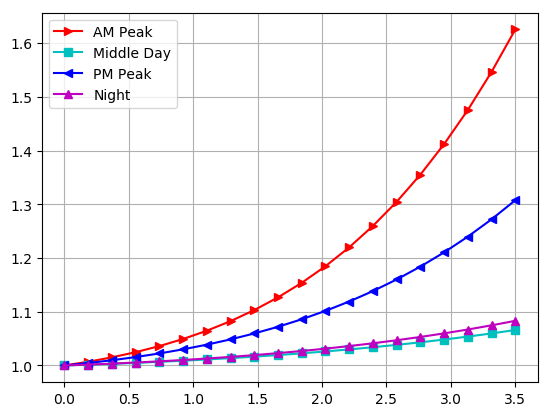

In [7]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

#Importing parameters
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport parameters_julia

out_dir = parameters_julia.out_dir
files_ID = parameters_julia.files_ID
month_w = parameters_julia.month_w
year = parameters_julia.year
instances = parameters_julia.instances_ID
key = "(5, 1.5, 1000.0, 1)"


cross_validation_best_key_Apr_AM = key
cross_validation_best_key_Apr_MD = key
cross_validation_best_key_Apr_PM = key
cross_validation_best_key_Apr_NT = key


coeffs_dict_Apr_AM = readstring( out_dir * "coeffs_dict_"* month_w * "_" * instances[1] * ".json")
coeffs_dict_Apr_AM = JSON.parse(coeffs_dict_Apr_AM)

coeffs_dict_Apr_MD = readstring( out_dir * "coeffs_dict_"* month_w * "_" * instances[2] * ".json")
coeffs_dict_Apr_MD = JSON.parse(coeffs_dict_Apr_MD)

coeffs_dict_Apr_PM = readstring( out_dir * "coeffs_dict_"* month_w * "_" * instances[3] * ".json")
coeffs_dict_Apr_PM = JSON.parse(coeffs_dict_Apr_PM)

coeffs_dict_Apr_NT = readstring( out_dir  * "coeffs_dict_"* month_w * "_" * instances[4] * ".json")
coeffs_dict_Apr_NT = JSON.parse(coeffs_dict_Apr_NT)

#coeffs_dict_Apr_weekend = readall("../temp_files/coeffs_dict_Apr_weekend.json")
#coeffs_dict_Apr_weekend = JSON.parse(coeffs_dict_Apr_weekend)


coeffs_best_Apr_AM = coeffs_dict_Apr_AM[cross_validation_best_key_Apr_AM]
coeffs_best_Apr_MD = coeffs_dict_Apr_MD[cross_validation_best_key_Apr_MD]
coeffs_best_Apr_PM = coeffs_dict_Apr_PM[cross_validation_best_key_Apr_PM]
coeffs_best_Apr_NT = coeffs_dict_Apr_NT[cross_validation_best_key_Apr_NT]
#coeffs_best_Apr_weekend = coeffs_dict_Apr_weekend[cross_validation_best_key_Apr_weekend]


using PyPlot

xs = linspace(0, 3.5, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Apr_AM = map(x->polyEval(coeffs_best_Apr_AM, x), xs)
ys_Apr_MD = map(x->polyEval(coeffs_best_Apr_MD, x), xs)
ys_Apr_PM = map(x->polyEval(coeffs_best_Apr_PM, x), xs)
ys_Apr_NT = map(x->polyEval(coeffs_best_Apr_NT, x), xs)
#ys_Apr_weekend = map(x->polyEval(coeffs_best_Apr_weekend, x), xs)

plot(xs, ys_Apr_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Apr_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Apr_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Apr_NT, "^-m", label="Night", linewidth=1.5)
#plot(xs, ys_Apr_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left") 

grid("on")
#=
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)
=#
savefig(out_dir * "fitting_comparison_"* month_w * ".pdf")

In [13]:
coeffs_best_Apr_PM

6-element Array{Any,1}:
 1.0       
 0.0198608 
 0.0128268 
 0.00491603
 0.00107689
 9.57169e-5